In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [7]:
dt_links=pd.read_csv("links.csv",encoding="utf-8")
dt_movies=pd.read_csv("movies.csv",encoding="utf-8")
dt_tags=pd.read_csv("tags.csv",encoding="utf-8")
dt_ratings=pd.read_csv("ratings.csv",encoding="utf-8")

### EDA

In [9]:
dt_movies.head(5)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Самые популярные жанры

<BarContainer object of 19 artists>

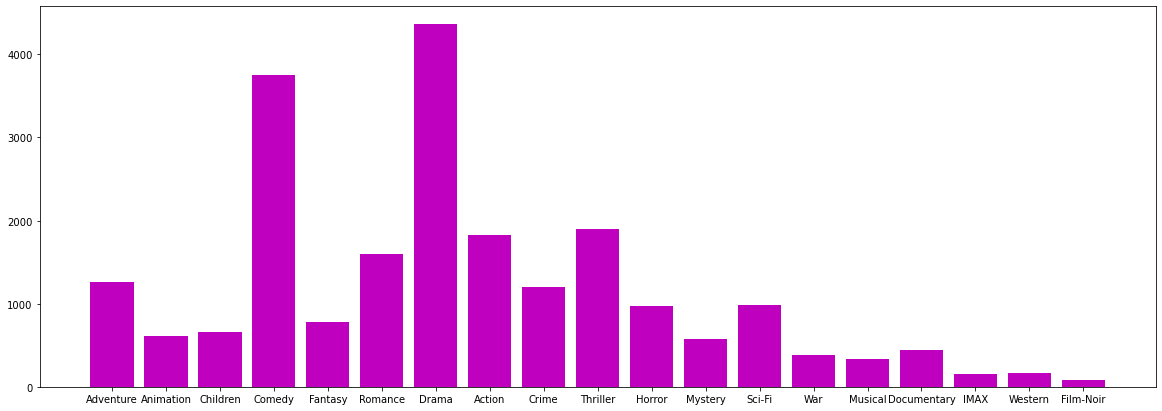

In [10]:
plt.figure(figsize=(20,7))
generlist = dt_movies['genres'].apply(lambda generlist_movie : str(generlist_movie).split("|"))
geners_count = {}

for generlist_movie in generlist:
    for gener in generlist_movie:
        if(geners_count.get(gener,False)):
            geners_count[gener]=geners_count[gener]+1
        else:
            geners_count[gener] = 1       
geners_count.pop("(no genres listed)")
plt.bar(geners_count.keys(),geners_count.values(),color='m')

Распределение проставленных рейтинго

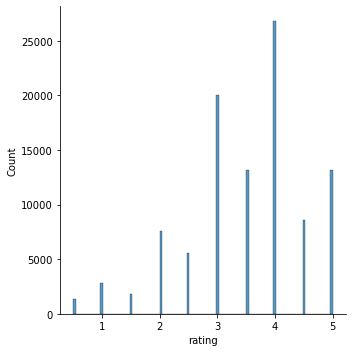

In [13]:
sns.displot(dt_ratings["rating"]);


Пользовтели оценившие больше всего фильмов

<AxesSubplot:ylabel='userId'>

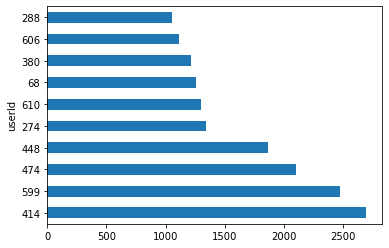

In [39]:
merge_ratings_movies = pd.merge(dt_movies, dt_ratings, on='movieId', how='inner').drop('timestamp', axis=1)
ratings_grouped_by_users = merge_ratings_movies.groupby('userId').agg([np.size, np.mean]).drop('movieId', axis = 1)
ratings_grouped_by_users['rating']['size'].sort_values(ascending=False).head(10).plot(kind='barh')


Фильм с наивысшим рейтингом

<AxesSubplot:ylabel='movieId'>

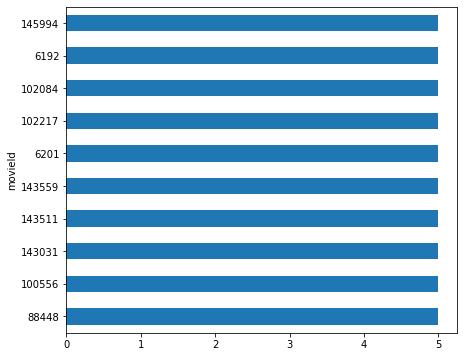

In [35]:
ratings_grouped_by_movies = merge_ratings_movies.groupby('movieId').agg([np.mean], np.size).drop('userId', axis=1)
ratings_grouped_by_movies['rating']['mean'].sort_values(ascending=False).head(10).plot(kind='barh', figsize=(7,6))


Худшие фильмы в плане рейтинга

<AxesSubplot:ylabel='movieId'>

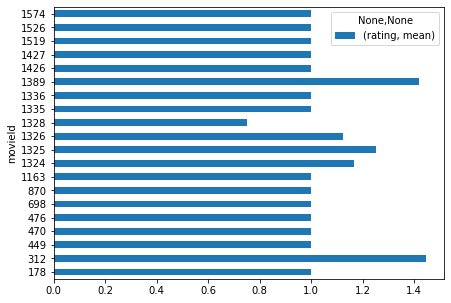

In [40]:
low_rated_movies_filter = ratings_grouped_by_movies['rating']['mean']< 1.5
low_rated_movies = ratings_grouped_by_movies[low_rated_movies_filter]
low_rated_movies.head(20).plot(kind='barh', figsize=(7,5))

In [43]:
low_rated_movies.shape[0]

296